In [1]:
!pip install qiskit
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
!pip install pylatexenc

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-yrc27stq
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-yrc27stq
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-cp36-none-any.whl size=16892 sha256=163c0160229e3fa360363aa5f805fc5eaf20d805a475253fe6a739c962195a3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-wlo96wx5/wheels/0c/57/26/1c12886a219af04a38ca1e674fdeeff40b8a5963326ba3c71a
Successfully built qiskit-textbook


In [2]:
!pip install pylatexenc

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget

In [4]:
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [5]:
n = 8
n_q = n # number of qubits
n_b = n # number of output bits
# extracting results
qc_output = QuantumCircuit(n_q, n_b)
for j in range(n):
    qc_output.measure(j, j)
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

{'00000000': 1024}


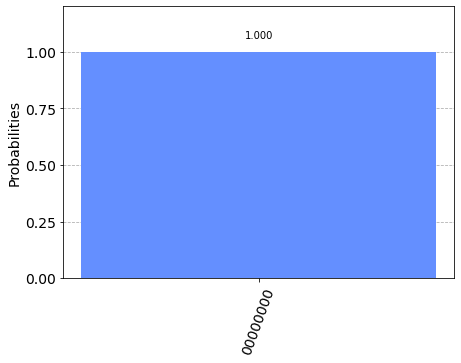

In [6]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)
plot_histogram(counts)

In [7]:
# encoding input
qc_encode = QuantumCircuit(n)
# NOT gate
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

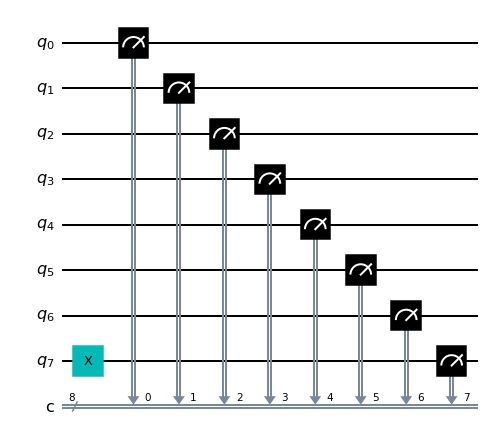

In [8]:
# extracting results
qc = qc_encode + qc_output
qc.draw(output='mpl', justify='none')

{'10000000': 1024}


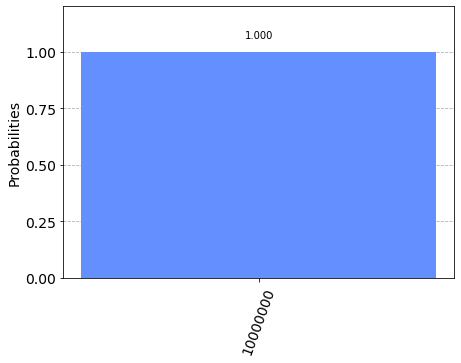

In [12]:
# run combined simulator
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)
plot_histogram(counts)